<a href="https://colab.research.google.com/github/isharambhal/Geopandas/blob/main/Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1- Write a program using geopandas to convert CSV with latitude and longitude in to geodataframe and project it to EPSG 4326

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# Read CSV file
df = pd.read_csv("/content/10_Locations_Lat_Long (1).csv")

In [4]:
# Converting the normal DataFrame into GeoDataFrame
# Points are created using Longitude and Latitude columns
gdf = gpd.GeoDataFrame(df,
        geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

In [5]:
print(gdf)

    Location  Latitude  Longitude                 geometry
0     Mumbai   19.0760    72.8777   POINT (72.8777 19.076)
1      Delhi   28.7041    77.1025  POINT (77.1025 28.7041)
2    Chennai   13.0827    80.2707  POINT (80.2707 13.0827)
3    Kolkata   22.5726    88.3639  POINT (88.3639 22.5726)
4  Bangalore   12.9716    77.5946  POINT (77.5946 12.9716)
5  Hyderabad   17.3850    78.4867   POINT (78.4867 17.385)
6       Pune   18.5204    73.8567  POINT (73.8567 18.5204)
7  Ahmedabad   23.0225    72.5714  POINT (72.5714 23.0225)
8     Jaipur   26.9124    75.7873  POINT (75.7873 26.9124)
9    Lucknow   26.8467    80.9462  POINT (80.9462 26.8467)


In [6]:
# Checking CRS before setting it
print("Before setting crs:", gdf.crs)

Before setting crs: None


In [7]:
# Setting CRS as EPSG:4326 (WGS84 coordinate system)
gdf = gdf.set_crs(epsg=4326)

In [8]:
# Printing CRS after setting
print("Reprojection:", gdf.crs)

Reprojection: EPSG:4326


#Q2- Write a program using geopandas to merge and concat two datasets

In [ ]:
import geopandas
import matplotlib.pyplot as ply
import pandas as pd

In [11]:
import geopandas
# Load Shapefile
path ="/content/ne_10m_admin_0_countries.shp"
gd = geopandas.read_file(path)

In [12]:
# Printing all column names to understand the dataset structure
print(gd.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [13]:
# Creating a new GeoDataFrame with only country code and geometry
# SOV_A3 is used as a unique country identifier
gd1 = gd[["SOV_A3", "geometry"]]

# Creating a normal DataFrame with country code and country name
# This will be used for merging
df = gd[["SOV_A3", "ADMIN"]]

In [14]:
print("GD original")
print(df.head())

GD original
  SOV_A3      ADMIN
0    IDN  Indonesia
1    MYS   Malaysia
2    CHL      Chile
3    BOL    Bolivia
4    PER       Peru


In [15]:
# MERGE (Attribute Join)
# Here we are joining gd1 and df using the common column 'SOV_A3'
# This adds the country name column to the GeoDataFrame
gd_merge = gd1.merge(df, on="SOV_A3")

In [16]:
print("Geodataframe after merge:")
print(gd_merge.head())

Geodataframe after merge:
  SOV_A3                                           geometry      ADMIN
0    IDN  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...  Indonesia
1    MYS  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...   Malaysia
2    CHL  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...      Chile
3    BOL  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...    Bolivia
4    PER  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...       Peru


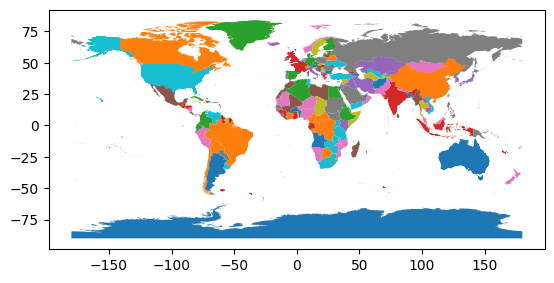

In [18]:
# Plotting the merged GeoDataFrame
# Countries are colored based on SOV_A3 code
gd_merge.plot(column="SOV_A3")
plt.show()

In [19]:
# CONCAT
# Now we are dividing the dataset into two parts
part1 = gd_merge.iloc[:90]  # First 90 rows
part2 = gd_merge.iloc[90:]  # Remaining rows

In [20]:
# Joining both parts back together using concat
# This stacks the rows vertically
gd_concat = pd.concat([part1, part2])

In [21]:
print("After Concat:")
print(gd_concat.head())

After Concat:
  SOV_A3                                           geometry      ADMIN
0    IDN  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...  Indonesia
1    MYS  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...   Malaysia
2    CHL  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...      Chile
3    BOL  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...    Bolivia
4    PER  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...       Peru


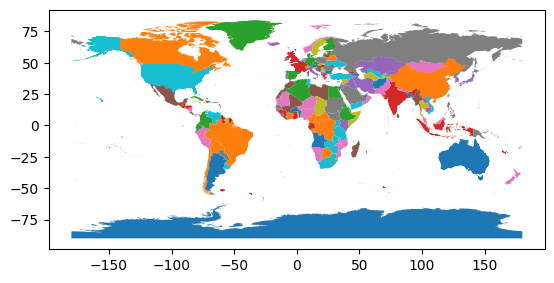

In [23]:
# Plotting the concatenated dataset
gd_concat.plot(column="SOV_A3")
plt.show()

#Q3- Write a program using geopandas to perform spatial join (Use Left, Right and inner join)

In [24]:
# Load Natural Earth Countries Shapefile
# (Same path used in Question 2)
countries = geopandas.read_file(path)

In [25]:
print("Columns in Countries Dataset:")
print(countries.columns)

Columns in Countries Dataset:
Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [26]:
# Creating a small dataset of city locations
# These will be converted into point geometries

city_data = pd.DataFrame({
    "City": ["Mumbai", "New York", "London", "Tokyo"],
    "Longitude": [72.8777, -74.0060, -0.1276, 139.6503],
    "Latitude": [19.0760, 40.7128, 51.5074, 35.6762]
})


In [27]:
# Converting the city data into a GeoDataFrame
# Points are created using longitude and latitude

cities = geopandas.GeoDataFrame(
    city_data,
    geometry = geopandas.points_from_xy(city_data.Longitude, city_data.Latitude),
    crs = "EPSG:4326"
)

In [28]:
# Making sure both datasets have the same CRS
cities = cities.to_crs(countries.crs)

In [29]:
print("Columns in Cities Dataset:")
print(cities.columns)

Columns in Cities Dataset:
Index(['City', 'Longitude', 'Latitude', 'geometry'], dtype='object')


In [30]:
# INNER JOIN
# This will return only the cities that fall inside a country polygon

inner_join = geopandas.sjoin(
    cities, countries,
    how="inner",
    predicate="within"
)

In [31]:
print("INNER JOIN RESULT")
print(inner_join.head())

INNER JOIN RESULT
       City  Longitude  Latitude                  geometry  index_right  \
0    Mumbai    72.8777   19.0760    POINT (72.8777 19.076)            8   
1  New York   -74.0060   40.7128   POINT (-74.006 40.7128)          154   
2    London    -0.1276   51.5074   POINT (-0.1276 51.5074)           78   
3     Tokyo   139.6503   35.6762  POINT (139.6503 35.6762)          189   

        featurecla  scalerank  LABELRANK                SOVEREIGNT SOV_A3  \
0  Admin-0 country          0          2                     India    IND   
1  Admin-0 country          0          2  United States of America    US1   
2  Admin-0 country          0          2            United Kingdom    GB1   
3  Admin-0 country          0          2                     Japan    JPN   

   ...  FCLASS_VN  FCLASS_TR FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT  \
0  ...       None       None      None      None      None      None   
1  ...       None       None      None      None      None      None   
2  .

In [32]:
# LEFT JOIN
# This keeps all cities and adds country information if matched

left_join = geopandas.sjoin(
    cities, countries,
    how="left",
    predicate="within"
)

In [33]:
print("LEFT JOIN RESULT")
print(left_join.head())

LEFT JOIN RESULT
       City  Longitude  Latitude                  geometry  index_right  \
0    Mumbai    72.8777   19.0760    POINT (72.8777 19.076)            8   
1  New York   -74.0060   40.7128   POINT (-74.006 40.7128)          154   
2    London    -0.1276   51.5074   POINT (-0.1276 51.5074)           78   
3     Tokyo   139.6503   35.6762  POINT (139.6503 35.6762)          189   

        featurecla  scalerank  LABELRANK                SOVEREIGNT SOV_A3  \
0  Admin-0 country          0          2                     India    IND   
1  Admin-0 country          0          2  United States of America    US1   
2  Admin-0 country          0          2            United Kingdom    GB1   
3  Admin-0 country          0          2                     Japan    JPN   

   ...  FCLASS_VN  FCLASS_TR FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT  \
0  ...       None       None      None      None      None      None   
1  ...       None       None      None      None      None      None   
2  ..

In [34]:
# RIGHT JOIN
# This keeps all country polygons and matches cities that fall within them

right_join = geopandas.sjoin(
    cities, countries,
    how="right",
    predicate="within"
)

In [35]:
print("RIGHT JOIN RESULT")
print(right_join.head())

RIGHT JOIN RESULT
   index_left City  Longitude  Latitude       featurecla  scalerank  \
0         NaN  NaN        NaN       NaN  Admin-0 country          0   
1         NaN  NaN        NaN       NaN  Admin-0 country          0   
2         NaN  NaN        NaN       NaN  Admin-0 country          0   
3         NaN  NaN        NaN       NaN  Admin-0 country          0   
4         NaN  NaN        NaN       NaN  Admin-0 country          0   

   LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  ...  FCLASS_TR FCLASS_ID FCLASS_PL  \
0          2  Indonesia    IDN         0  ...       None      None      None   
1          3   Malaysia    MYS         0  ...       None      None      None   
2          2      Chile    CHL         0  ...       None      None      None   
3          3    Bolivia    BOL         0  ...       None      None      None   
4          2       Peru    PER         0  ...       None      None      None   

  FCLASS_GR FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      